In [1]:
import numpy as np
import pandas as pd


from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error





from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [2]:
boston=load_boston()

In [3]:
type(boston)

sklearn.utils.Bunch

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [8]:
data=boston.data
type(data)

numpy.ndarray

In [9]:
data=pd.DataFrame(data=data,columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
data['PRICE']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [12]:
data.describe() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
PRICE      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [14]:
# Data visulization

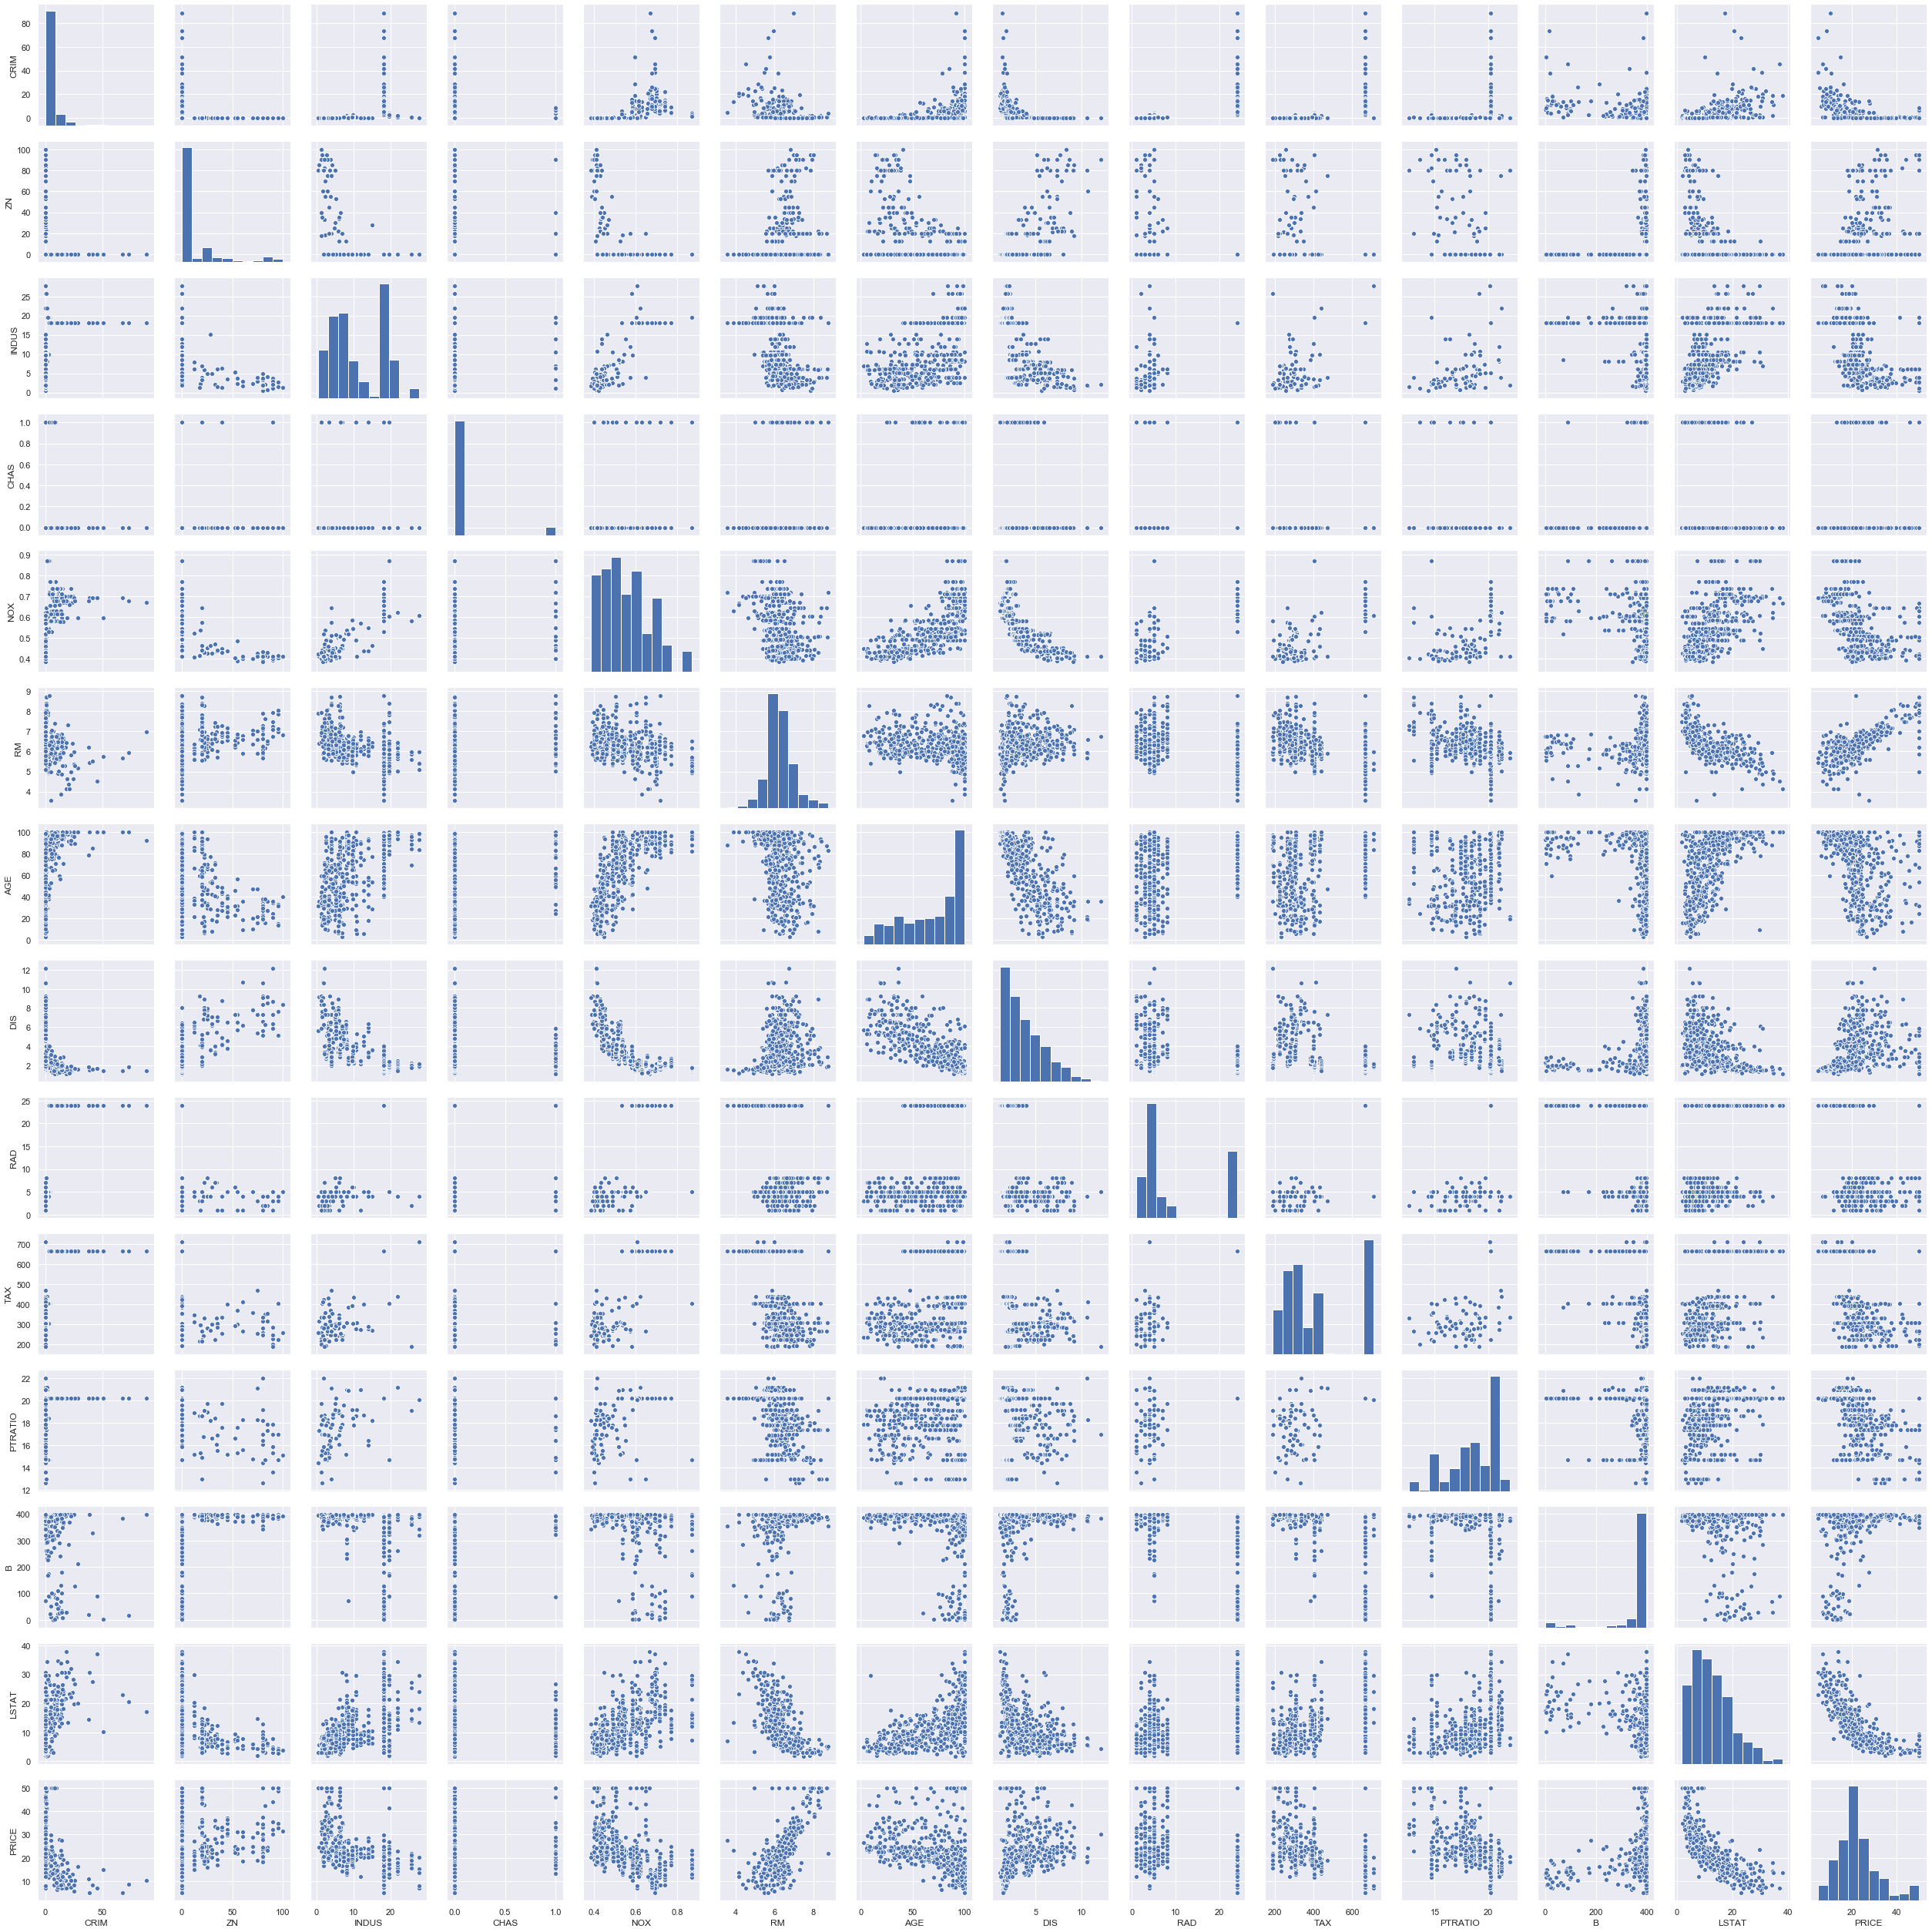

In [15]:
sns.pairplot(data)  

In [36]:
# replacing zero values with the mean of the column
data['CRIM'] = data['CRIM'].replace(0,data['CRIM'].mean())
#data['ZN'] = data['ZN'].replace(0,data['ZN'].mean())
data['INDUS'] = data['INDUS'].replace(0,data['INDUS'].mean())
#data['CHAS'] = data['CHAS'].replace(0,data['CHAS'].mean())
data['NOX'] = data['NOX'].replace(0,data['NOX'].mean())

# replacing zero values with the mean of the column
data['RM'] = data['RM'].replace(0,data['RM'].mean())
data['AGE'] = data['AGE'].replace(0,data['AGE'].mean())
data['DIS'] = data['DIS'].replace(0,data['DIS'].mean())
data['RAD'] = data['RAD'].replace(0,data['RAD'].mean())
data['TAX'] = data['TAX'].replace(0,data['TAX'].mean())

# replacing zero values with the mean of the column
data['PTRATIO'] = data['PTRATIO'].replace(0,data['PTRATIO'].mean())
#df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
data['B'] = data['B'].replace(0,data['B'].mean())
data['LSTAT'] = data['LSTAT'].replace(0,data['LSTAT'].mean())
#data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

KeyError: 'B'

In [30]:
# feature selection

IndexError: index 13 is out of bounds for axis 0 with size 13

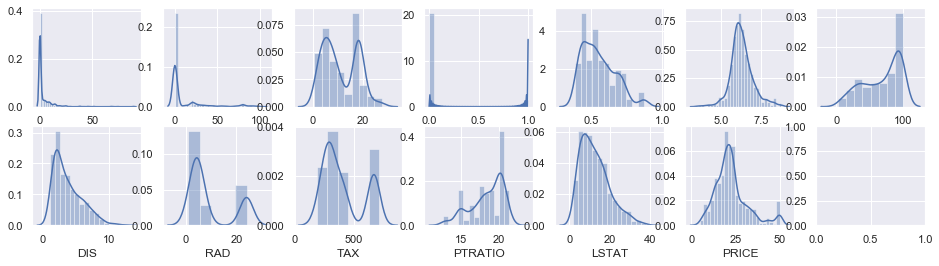

In [37]:
rows=2
cols=7
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(16,4))

col=data.columns
index=0


for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]],ax=ax[i][j])
        index=index+1

plt.tight_layout()

In [ ]:
#now we aare going to plot cooreletion matrix

In [ ]:
corrmat=data.corr()
corrmat

In [ ]:
fig,ax=plt.subplots(figsize=(16,15))
sns.heatmap(corrmat,annot=True,annot_kws={'size':10})

In [ ]:
corrmat.index.values

In [ ]:
def getCorreletedFeature(corrdata,threshold):
    feature=[]
    value=[]
    
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df=pd.DataFrame(data=value,index=feature,columns=['corr value'])
    return df

In [105]:
threshold=0.50
corr_value=getCorreletedFeature(corrmat['PRICE'],threshold)
corr_value

,corr value
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663
PRICE,1.000000


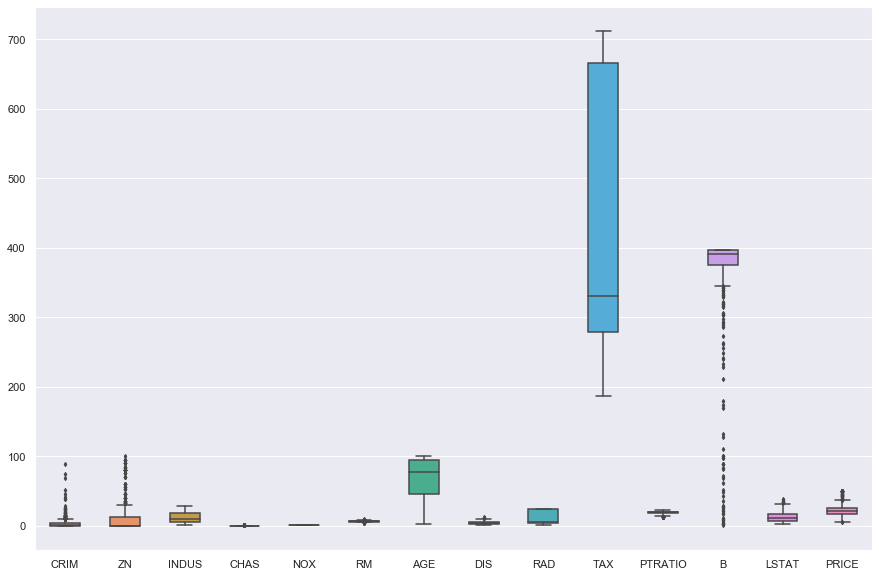

In [20]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)


In [25]:
data.drop(['B'], axis=1,inplace=True)
data.head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4


In [91]:
X=data.drop('PRICE',axis=1)
y=data['PRICE']


print("shape of x=",X.shape)
print("shape of y=",y.shape)

shape of x= (506, 12)
shape of y= (506,)


# preprocessing

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.25, random_state=75)

In [90]:
#len(X_train)
len(y_test)

127

NameError: name 'x_test' is not defined

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lm=LinearRegression()

In [57]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
lm.coef_

array([-1.47656780e-01,  3.90756152e-02,  3.92415391e-02,  4.04496002e+00,
       -1.75780765e+01,  4.00025888e+00, -3.67263292e-03, -1.43644760e+00,
        2.96646726e-01, -9.59355436e-03, -8.78599798e-01, -5.89166270e-01])

In [107]:
r_square=lm.score(X_test,y_test)
r_square

0.7126079886264522

In [108]:
vif=1/(1-r_square)
vif

3.479567839135985

In [109]:
predictions =lm.predict(X_test)
predictions

array([34.40555059, 22.31348729, 22.06924335, 28.88748718, 18.59276567,
       15.00826349, 25.12204045, 18.87085292, 21.08321216, 19.08819375,
        9.62078192, 22.95754341, 20.31434839, 24.47881112, 23.6518433 ,
       30.79113697, 24.98326809, 19.93054878, 21.44337199, 18.81664685,
       20.65183056, 20.60934583, 22.91830295, 37.02293561, 24.42130818,
       26.5406554 , 23.42774524, 16.27843685, 37.9818188 , 11.48606814,
       25.22047362, 25.13652242, 25.06101482, 32.71628061, 22.53184647,
       33.26058844, 35.69960091, 16.5518183 , 31.00948418, 14.75885675,
       20.00841583, 40.7016482 , 20.98160437, 20.55049357, 20.32634559,
       23.06957079, 17.02865183, 27.09021193,  5.88342345, 25.97855325,
       21.94560707, 22.95179945, 16.28365314, 25.76701266, 22.34536169,
       19.78897048, 19.74336741, 23.76494477, 24.46955642, 40.63792416,
       22.87805418, 36.54957045, 20.53927993, 20.58950003, 37.20670464,
       24.8189754 , 38.63149413, 24.70185612, 13.15224262, 16.57

In [110]:
y_test

180    39.8
502    20.6
121    20.3
95     28.4
469    20.1
       ... 
1      21.6
280    45.4
338    20.6
301    22.0
484    20.6
Name: PRICE, Length: 127, dtype: float64

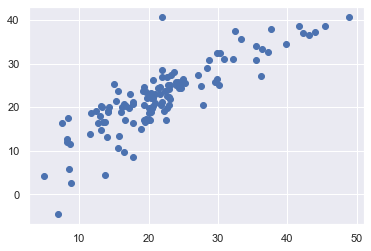

In [111]:
plt.scatter(y_test,predictions)

In [112]:
from sklearn.metrics import r2_score
score=r2_score(y_test,predictions)
mae=mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)


print('r2 =',score)
print('mae =',mae)
print('mse =',mse)

r2 = 0.7126079886264522
mae = 3.548431259283469
mse = 20.697165131938615


In [113]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =15, max_iter = 100, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=15, eps=0.001, fit_intercept=True,
        max_iter=100, n_alphas=100, n_jobs=None, normalize=True, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [114]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0020154571253090158

In [115]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train )

Lasso(alpha=0.0020154571253090158, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
lasso_reg.score(X_test, y_test)

0.7124673146379237

In [117]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

H:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RidgeCV(alphas=array([7.3374386 , 8.8566438 , 8.68173918, 5.5098385 , 8.72598416,
       4.8367692 , 5.44938772, 2.75911625, 8.91143189, 3.24278945,
       6.89703118, 2.33779301, 6.51788273, 7.14858621, 6.38517145,
       3.35581482, 3.32075513, 9.36826567, 5.69091403, 4.11272426,
       1.93095261, 1.90957987, 1.67852848, 3.15580205, 3.32457961,
       6.95803815, 8.88993547, 2.20936074, 7.45033515, 6.14853184,
       1.03765268, 8.8256146 , 6.78880128, 1.97233797, 8.23764418,
       3.98347595, 1.48925095, 9.66584329, 4.58376117, 3.86810919,
       3.8744325 , 0.67127018, 3.98710125, 4.69068994, 8.82577823,
       1.16163883, 3.01036423, 5.31987557, 0.50209606, 6.74518785]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [118]:
ridgecv.alpha_

0.5020960605921587

In [119]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.5020960605921587, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [121]:
ridge_model.score(X_test, y_test)

0.708454924067891